### Итоговая работа по блоку “Метрики, гипотезы, точки роста” 

In [353]:
import pandas as pd

In [354]:
df = pd.read_csv(r'C:\Users\Лина\OneDrive\Рабочий стол\study\metrics\Data_Sample_Online_Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,"1,69",13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/10 8:34,"5,95",13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 9:02,"2,75",17850.0,United Kingdom


In [355]:
# посмотрим состав данных и базовые статистики по датасету

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    54214 non-null  object 
 1   StockCode    54214 non-null  object 
 2   Description  54080 non-null  object 
 3   Quantity     54214 non-null  int64  
 4   InvoiceDate  54214 non-null  object 
 5   UnitPrice    54214 non-null  object 
 6   CustomerID   40643 non-null  float64
 7   Country      54214 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.3+ MB


In [357]:
df.describe()

,Quantity,CustomerID
count,54214.000000,40643.000000
mean,9.610802,15283.422803
std,57.358422,1707.982278
min,-9600.000000,12347.000000
25%,1.000000,13969.000000
50%,3.000000,15152.000000
75%,10.000000,16775.000000
max,2400.000000,18287.000000


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    54214 non-null  object 
 1   StockCode    54214 non-null  object 
 2   Description  54080 non-null  object 
 3   Quantity     54214 non-null  int64  
 4   InvoiceDate  54214 non-null  object 
 5   UnitPrice    54214 non-null  object 
 6   CustomerID   40643 non-null  float64
 7   Country      54214 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.3+ MB


In [359]:
# поменяем формат столбца с  ценами
df['UnitPrice'] = df['UnitPrice'].replace(',', '.', regex=True).astype(float)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/10 8:34,5.95,13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,4.95,13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 9:02,2.75,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,12/9/11 12:31,0.85,15804.0,United Kingdom
54210,581585,23084,RABBIT NIGHT LIGHT,12,12/9/11 12:31,2.08,15804.0,United Kingdom
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,12/9/11 12:31,0.42,15804.0,United Kingdom
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,12/9/11 12:50,1.95,12680.0,France


In [360]:
# InvoiceNo
#  в датасете есть номера заказов начинающиеся с "С" и отрицательным количеством - делаем вывод, что это отмененные заказы
# посмотрим сколько таких заказов, сколько клиентов от какого суммарного кол-ва товаров отказались

In [361]:
df_c = df.loc[df['InvoiceNo'] >'C']
df_c

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
19,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
30,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
31,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
202,C536548,20957,PORCELAIN HANGING BELL SMALL,-1,12/1/10 14:33,1.45,12472.0,Germany
375,C536642,21463,MIRRORED DISCO BALL,-1,12/2/10 11:56,5.95,14390.0,United Kingdom
...,...,...,...,...,...,...,...,...
53704,C581229,79191C,RETRO PLASTIC ELEPHANT TRAY,-24,12/8/11 10:14,0.85,12558.0,USA
53705,C581229,21507,ELEPHANT BIRTHDAY CARD,-12,12/8/11 10:14,0.42,12558.0,USA
53765,C581322,22666,RECIPE BOX PANTRY YELLOW DESIGN,-1,12/8/11 11:51,2.95,18223.0,United Kingdom
53770,C581330,22959,WRAP CHRISTMAS VILLAGE,-25,12/8/11 11:57,0.42,15877.0,United Kingdom


In [362]:
# отмененных заказов было 746
len(df_c.groupby('InvoiceNo'))

746

In [363]:
# что составляет 5% от общего числа заказов 
len(df_c.groupby('InvoiceNo'))/len(df.groupby('InvoiceNo'))*100

5.014451838408282

In [364]:
# всего идентифицировано 517 отказавшихся клиентов
len(df_c.groupby('CustomerID'))

517

In [365]:
# можем посмотреть какой клиент в каком заказе от скольких товаров отказался
df_c.groupby(['CustomerID','InvoiceNo'])['Quantity'].sum()

CustomerID  InvoiceNo
12362.0     C544902      -1
            C563752      -1
            C579178      -2
12365.0     C544577      -1
12415.0     C545525     -24
                         ..
18248.0     C563587      -5
18257.0     C554152     -12
18274.0     C577832     -18
18276.0     C577386      -1
            C577390      -1
Name: Quantity, Length: 719, dtype: int64

In [366]:
# сумма отмененных заказов - упущенная выгода
(df_c['Quantity']*df_c['UnitPrice']).sum()

-56072.1

In [367]:
# StockCode

In [368]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='StockCode', ylabel='Count'>

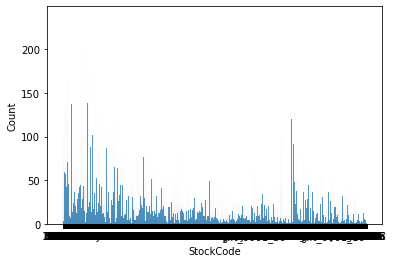

In [419]:
sns.histplot(df['StockCode'], kde=False, bins=100)

In [370]:
# о частоте покупок тех или иных товаров по обычной гистограмме судить сложно, т.к. позиций в магазине крайне много
# анализировать стоит по сегментам, сравнивая их внутри и между собой.

In [371]:
# для первичного понимания сделаем сортировку товаров по убыванию кол-ва проданных, выведем топ 10

In [372]:
df.groupby(['StockCode'])['Quantity'].sum().sort_values(ascending=False).head(10)

StockCode
85099B    5114
21212     5098
84879     4430
84077     4228
21915     3834
85123A    3390
15036     3177
16014     3075
22197     2924
22492     2888
Name: Quantity, dtype: int64

In [373]:
# Description 

In [374]:
# метод value-counts - сформирует нам топ продаж
# по нему можем первично на глаз проанализировать основные тренды и  ключевые слова в описании популярных товаров
df['Description'].value_counts().head(20)

WHITE HANGING HEART T-LIGHT HOLDER    243
JUMBO BAG RED RETROSPOT               222
REGENCY CAKESTAND 3 TIER              204
LUNCH BAG RED RETROSPOT               175
PACK OF 72 RETROSPOT CAKE CASES       164
PARTY BUNTING                         162
LUNCH BAG  BLACK SKULL.               149
JUMBO BAG PINK POLKADOT               141
SET OF 3 CAKE TINS PANTRY DESIGN      140
NATURAL SLATE HEART CHALKBOARD        138
ASSORTED COLOUR BIRD ORNAMENT         138
JUMBO SHOPPER VINTAGE RED PAISLEY     137
ALARM CLOCK BAKELIKE RED              126
WOODEN PICTURE FRAME WHITE FINISH     125
SPOTTY BUNTING                        123
PAPER CHAIN KIT 50'S CHRISTMAS        120
LUNCH BAG PINK POLKADOT               119
LUNCH BAG SPACEBOY DESIGN             119
POSTAGE                               118
JAM MAKING SET PRINTED                118
Name: Description, dtype: int64

In [375]:
# на основе всех данных сделать облако слов

In [376]:
texts = list(df['Description'])
texts

['RED WOOLLY HOTTIE WHITE HEART.',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'LOVE BUILDING BLOCK WORD',
 'BLUE COAT RACK PARIS FASHION',
 'CREAM CUPID HEARTS COAT HANGER',
 'WOODEN FRAME ANTIQUE WHITE ',
 'JUMBO BAG CHARLIE AND LOLA TOYS',
 'AIRLINE LOUNGE,METAL SIGN',
 "YOU'RE CONFUSING ME METAL SIGN ",
 'GIN + TONIC DIET METAL SIGN',
 'YELLOW BREAKFAST CUP AND SAUCER',
 'FELT EGG COSY WHITE RABBIT ',
 'SET OF 6 FUNKY BEAKERS',
 'EDWARDIAN PARASOL BLACK',
 'BLUE OWL SOFT TOY',
 'RED TOADSTOOL LED NIGHT LIGHT',
 'RECYCLING BAG RETROSPOT ',
 'ALARM CLOCK BAKELIKE GREEN',
 'SET 3 WICKER OVAL BASKETS W LIDS',
 'SET OF 3 COLOURED  FLYING DUCKS',
 'ENAMEL FIRE BUCKET CREAM',
 'LUNCH BAG DOLLY GIRL DESIGN',
 'JUMBO  BAG BAROQUE BLACK WHITE',
 'FIVE HEART HANGING DECORATION',
 'HOMEMADE JAM SCENTED CANDLES',
 'SET OF 3 COLOURED  FLYING DUCKS',
 'ALARM CLOCK BAKELIKE RED ',
 'SMALL HEART MEASURING SPOONS',
 'HANGING HEART ZINC T-LIGHT HOLDER',
 'PHOTO CUBE',
 'PACK OF 12 BLUE PAISLEY TISSUES ',
 'PA

In [377]:
texts_lower_case = [str(text).lower() for text in texts]
texts_lower_case[:5]

['red woolly hottie white heart.',
 'assorted colour bird ornament',
 'love building block word',
 'blue coat rack paris fashion',
 'cream cupid hearts coat hanger']

In [378]:
import re

In [379]:
# уберем все служебные символы
only_words_text = [re.sub('[\W_]+',' ', text) for text in texts_lower_case]
only_words_text[:5]

['red woolly hottie white heart ',
 'assorted colour bird ornament',
 'love building block word',
 'blue coat rack paris fashion',
 'cream cupid hearts coat hanger']

In [380]:
# разделим все на слова
texts_splitted = [text.split() for text in only_words_text]
texts_splitted[:5]

[['red', 'woolly', 'hottie', 'white', 'heart'],
 ['assorted', 'colour', 'bird', 'ornament'],
 ['love', 'building', 'block', 'word'],
 ['blue', 'coat', 'rack', 'paris', 'fashion'],
 ['cream', 'cupid', 'hearts', 'coat', 'hanger']]

In [381]:
# уберем стоп-слова
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Лина\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [382]:
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english'))
stopwords_set

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [383]:
without_sw = [[word for word in text if word not in stopwords_set] for text in texts_splitted]
without_sw[:10]

[['red', 'woolly', 'hottie', 'white', 'heart'],
 ['assorted', 'colour', 'bird', 'ornament'],
 ['love', 'building', 'block', 'word'],
 ['blue', 'coat', 'rack', 'paris', 'fashion'],
 ['cream', 'cupid', 'hearts', 'coat', 'hanger'],
 ['wooden', 'frame', 'antique', 'white'],
 ['jumbo', 'bag', 'charlie', 'lola', 'toys'],
 ['airline', 'lounge', 'metal', 'sign'],
 ['confusing', 'metal', 'sign'],
 ['gin', 'tonic', 'diet', 'metal', 'sign']]

In [384]:
# Произведем лемматизацию
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_text = [[wordnet_lemmatizer.lemmatize(word) for word in text] for text in without_sw]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Лина\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [385]:
lemmatized_text[:10]

[['red', 'woolly', 'hottie', 'white', 'heart'],
 ['assorted', 'colour', 'bird', 'ornament'],
 ['love', 'building', 'block', 'word'],
 ['blue', 'coat', 'rack', 'paris', 'fashion'],
 ['cream', 'cupid', 'heart', 'coat', 'hanger'],
 ['wooden', 'frame', 'antique', 'white'],
 ['jumbo', 'bag', 'charlie', 'lola', 'toy'],
 ['airline', 'lounge', 'metal', 'sign'],
 ['confusing', 'metal', 'sign'],
 ['gin', 'tonic', 'diet', 'metal', 'sign']]

In [386]:
descriptions = [' '.join(text) for text in lemmatized_text]
descriptions

['red woolly hottie white heart',
 'assorted colour bird ornament',
 'love building block word',
 'blue coat rack paris fashion',
 'cream cupid heart coat hanger',
 'wooden frame antique white',
 'jumbo bag charlie lola toy',
 'airline lounge metal sign',
 'confusing metal sign',
 'gin tonic diet metal sign',
 'yellow breakfast cup saucer',
 'felt egg cosy white rabbit',
 'set 6 funky beaker',
 'edwardian parasol black',
 'blue owl soft toy',
 'red toadstool led night light',
 'recycling bag retrospot',
 'alarm clock bakelike green',
 'set 3 wicker oval basket w lid',
 'set 3 coloured flying duck',
 'enamel fire bucket cream',
 'lunch bag dolly girl design',
 'jumbo bag baroque black white',
 'five heart hanging decoration',
 'homemade jam scented candle',
 'set 3 coloured flying duck',
 'alarm clock bakelike red',
 'small heart measuring spoon',
 'hanging heart zinc light holder',
 'photo cube',
 'pack 12 blue paisley tissue',
 'pack 12 red retrospot tissue',
 'retrospot lamp',
 'chic

In [387]:
descriptions_all = ''
for text in descriptions:
    descriptions_all += text+' '
descriptions_all[:1000]

'red woolly hottie white heart assorted colour bird ornament love building block word blue coat rack paris fashion cream cupid heart coat hanger wooden frame antique white jumbo bag charlie lola toy airline lounge metal sign confusing metal sign gin tonic diet metal sign yellow breakfast cup saucer felt egg cosy white rabbit set 6 funky beaker edwardian parasol black blue owl soft toy red toadstool led night light recycling bag retrospot alarm clock bakelike green set 3 wicker oval basket w lid set 3 coloured flying duck enamel fire bucket cream lunch bag dolly girl design jumbo bag baroque black white five heart hanging decoration homemade jam scented candle set 3 coloured flying duck alarm clock bakelike red small heart measuring spoon hanging heart zinc light holder photo cube pack 12 blue paisley tissue pack 12 red retrospot tissue retrospot lamp chick grey hot water bottle alarm clock bakelike orange hot water bottle tea sympathy red retrospot mug hot water bottle tea sympathy whi

In [388]:
pip install wordcloud

In [389]:
import wordcloud
from wordcloud import WordCloud

In [390]:
wordcloud = WordCloud().generate(descriptions_all)

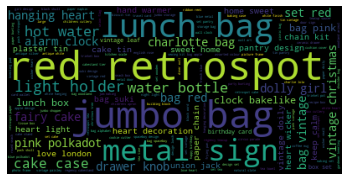

In [391]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [392]:
from nltk.probability import FreqDist
fdist = FreqDist(descriptions_all.split(sep = ' '))

In [393]:
# посмотрим частотность слов
fdist

FreqDist({'set': 6409, 'bag': 5246, 'red': 4450, 'heart': 4428, 'retrospot': 3602, 'vintage': 3389, 'pink': 3056, 'design': 3000, 'box': 2804, 'christmas': 2502, ...})

In [394]:
fdist.most_common(20)

[('set', 6409),
 ('bag', 5246),
 ('red', 4450),
 ('heart', 4428),
 ('retrospot', 3602),
 ('vintage', 3389),
 ('pink', 3056),
 ('design', 3000),
 ('box', 2804),
 ('christmas', 2502),
 ('light', 2334),
 ('cake', 2286),
 ('white', 2216),
 ('jumbo', 2146),
 ('metal', 2084),
 ('3', 2056),
 ('blue', 1974),
 ('lunch', 1852),
 ('card', 1711),
 ('6', 1704)]

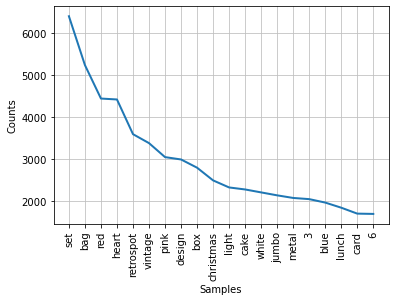

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [395]:
fdist.plot(20,cumulative=False)

In [396]:
# Quantity
df['Quantity'].describe()

count    54214.000000
mean         9.610802
std         57.358422
min      -9600.000000
25%          1.000000
50%          3.000000
75%         10.000000
max       2400.000000
Name: Quantity, dtype: float64

<AxesSubplot:>

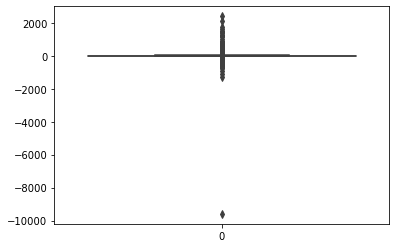

In [397]:
sns.boxplot(data = df['Quantity'])

In [398]:
# много выбросов, причем минимум и максимум отличаются от основного  размаха на порядки, что может свидетельствовать об ошибке,
# для анализа будем брать данные без учета значительных выбросов, их можно при необходимости отдельно поисследовать для выявления причин

In [399]:
print(df['Quantity'].quantile(0.95))
print(df['Quantity'].quantile(0.01))

30.0
-2.0


In [400]:
df_qty = df.loc[(df['Quantity']<df['Quantity'].quantile(0.95)) & (df['Quantity']>df['Quantity'].quantile(0.01))]
df_qty

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/10 8:34,5.95,13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,4.95,13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 9:02,2.75,17850.0,United Kingdom
5,536375,82494L,WOODEN FRAME ANTIQUE WHITE,6,12/1/10 9:32,2.55,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,12/9/11 12:31,0.85,15804.0,United Kingdom
54210,581585,23084,RABBIT NIGHT LIGHT,12,12/9/11 12:31,2.08,15804.0,United Kingdom
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,12/9/11 12:31,0.42,15804.0,United Kingdom
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,12/9/11 12:50,1.95,12680.0,France


<AxesSubplot:>

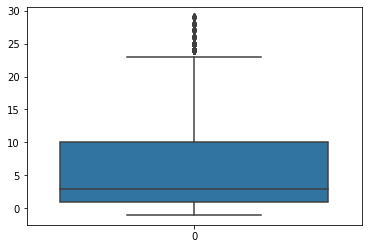

In [401]:
sns.boxplot(data = df_qty['Quantity'])

In [402]:
# т.е. отмели % строк
(len(df)-len(df_qty))/len(df)*100

6.1829047847419485

<AxesSubplot:xlabel='Quantity', ylabel='Count'>

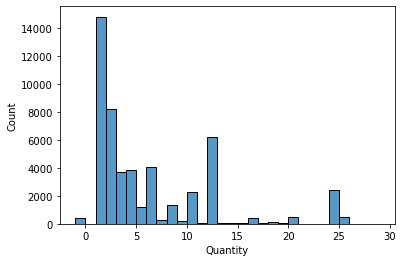

In [403]:
sns.histplot(data = df_qty['Quantity'], bins=30)

In [404]:
# распределение ненормальное

In [405]:
# InvoiceDate 

In [406]:
import datetime

In [407]:
# преобразуем столбец с датами к корректному формату
df['InvoiceDate'] = [datetime.datetime.strptime(date, '%m/%d/%y %H:%M') for date in list(df['InvoiceDate'])]

In [408]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom


In [409]:
# оставим только даты без времени
dates = [date.date() for date in df['InvoiceDate']]
len(dates) 

54214

In [410]:
df['InvoiceDate'] = dates
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01,1.69,13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01,5.95,13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01,4.95,13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,2011-12-09,0.85,15804.0,United Kingdom
54210,581585,23084,RABBIT NIGHT LIGHT,12,2011-12-09,2.08,15804.0,United Kingdom
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2011-12-09,0.42,15804.0,United Kingdom
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09,1.95,12680.0,France


In [ ]:
# plt.plot(df['InvoiceDate'], df['InvoiceNo'])

In [423]:
# можем посмотреть различные показатели при группировке по дате
df.groupby('InvoiceDate').count()[['StockCode','CustomerID']]

,StockCode,CustomerID
InvoiceDate,,
2010-12-01,309,211
2010-12-02,218,212
2010-12-03,229,111
2010-12-05,264,264
2010-12-06,369,186
...,...,...
2011-12-05,527,349
2011-12-06,342,265
2011-12-07,229,207


In [424]:
df.groupby('InvoiceDate').sum()[['Quantity']]

,Quantity
InvoiceDate,
2010-12-01,2291
2010-12-02,2331
2010-12-03,1673
2010-12-05,1618
2010-12-06,2518
...,...
2011-12-05,5041
2011-12-06,2604
2011-12-07,5294


In [429]:
# UnitPrice
df['UnitPrice'].describe()

count    54214.000000
mean         4.307341
std         47.834496
min          0.000000
25%          1.250000
50%          2.080000
75%          4.130000
max       6930.000000
Name: UnitPrice, dtype: float64

<AxesSubplot:>

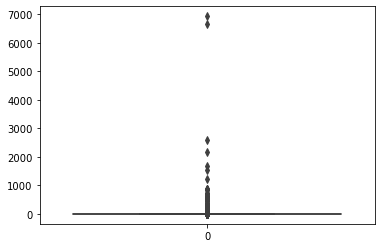

In [425]:
sns.boxplot(data = df['UnitPrice'])

In [ ]:
# большие выбросы в сторону очень высоких цен - стоит отдельно проверить что это за товары

In [442]:
df['UnitPrice'].quantile(0.995)

27.836849999994158

<AxesSubplot:ylabel='UnitPrice'>

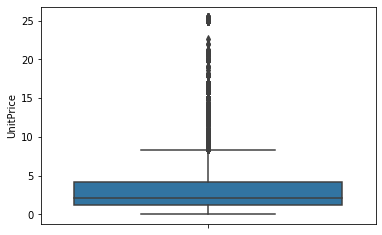

In [443]:
sns.boxplot(data = df.loc[df['UnitPrice']<df['UnitPrice'].quantile(0.995)], y='UnitPrice')

In [453]:
df.loc[df['UnitPrice'] >= df['UnitPrice'].quantile(0.995)].sort_values('UnitPrice', ascending= False).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
17425,C551699,M,Manual,-1,2011-05-03,6930.00,16029.0,United Kingdom
31245,C564341,AMAZONFEE,AMAZON FEE,-1,2011-08-24,6662.51,NaN,United Kingdom
12122,C546557,M,Manual,-1,2011-03-15,2583.76,NaN,Hong Kong
42864,C573550,AMAZONFEE,AMAZON FEE,-1,2011-10-31,2185.04,NaN,United Kingdom
11832,546329,M,Manual,1,2011-03-11,1687.17,14911.0,EIRE
50859,579196,DOT,DOTCOM POSTAGE,1,2011-11-28,1526.76,14096.0,United Kingdom
48504,577531,DOT,DOTCOM POSTAGE,1,2011-11-20,1236.75,NaN,United Kingdom
51571,579777,DOT,DOTCOM POSTAGE,1,2011-11-30,888.42,NaN,United Kingdom
35114,567656,DOT,DOTCOM POSTAGE,1,2011-09-21,878.55,14096.0,United Kingdom
8920,C543789,M,Manual,-1,2011-02-11,856.48,17450.0,United Kingdom


In [ ]:
# CustomerID 

In [461]:
df.groupby('CustomerID').count()[['InvoiceNo','StockCode']].sort_values('InvoiceNo', ascending= False)

,InvoiceNo,StockCode
CustomerID,,
17841.0,771,771
14911.0,563,563
14096.0,546,546
12748.0,447,447
14606.0,278,278
...,...,...
14022.0,1,1
16124.0,1,1
12950.0,1,1


In [464]:
df.groupby('CustomerID').sum()[['Quantity']].sort_values('Quantity', ascending= False)

,Quantity
CustomerID,
14646.0,20332
12415.0,9536
14911.0,8296
17450.0,7278
17511.0,6685
...,...
13217.0,-96
16546.0,-144
17888.0,-166


In [457]:
df.groupby('CustomerID').mean()

,Quantity,UnitPrice
CustomerID,,
12347.0,10.733333,3.048667
12348.0,72.000000,0.900000
12349.0,11.857143,2.500000
12350.0,12.000000,1.383333
12352.0,3.250000,13.750000
...,...,...
18278.0,5.000000,4.950000
18281.0,10.000000,1.650000
18282.0,9.000000,2.550000
